## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Loading Training and Test Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Dimension of Data

In [3]:
print(f"shape of train data: {train.shape}")
print(f"shape of test data: {test.shape}")

shape of train data: (1460, 81)
shape of test data: (1459, 80)


## Showing Missing Values

In [4]:
train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
# Missing Values That are greater than 50%
c=(train.isnull().sum(axis=0)/train.shape[0]*100).sort_values(ascending=False)
c[c >= 50]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
dtype: float64

<Axes: >

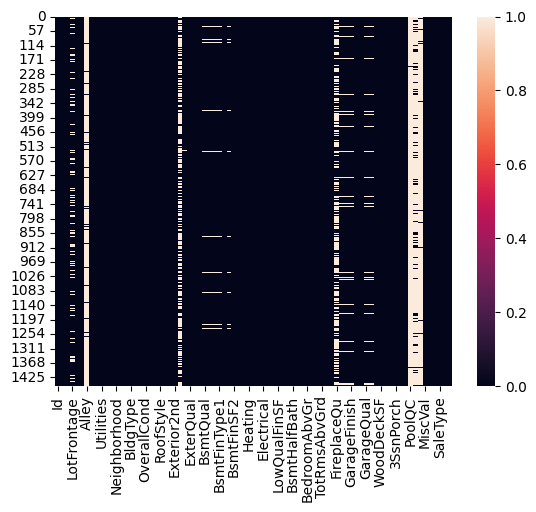

In [6]:
sns.heatmap(train.isnull())

In [7]:
test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [8]:
# Missing Values That are greater than 50%

z=(test.isnull().sum(axis=0)/test.shape[0]*100).sort_values(ascending=False)
z[z >= 50]

PoolQC         99.794380
MiscFeature    96.504455
Alley          92.666210
Fence          80.123372
MasVnrType     61.274846
FireplaceQu    50.034270
dtype: float64

<Axes: >

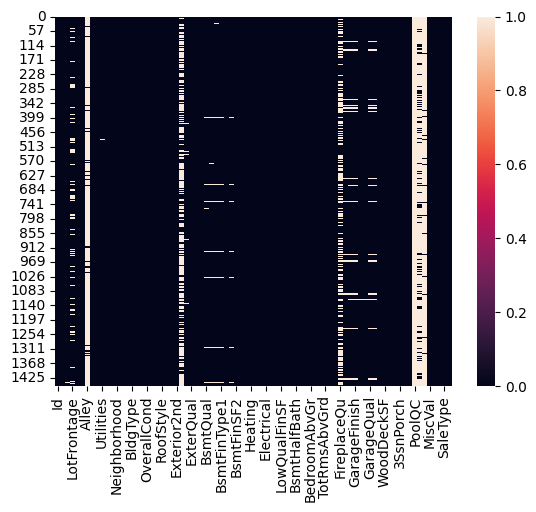

In [9]:
sns.heatmap(test.isnull())

## Data Info

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Duplicated Rows for Training and test data

In [12]:
print(f"Duplicated Rows in train data -> {train.duplicated().sum()}")
print(f"Duplicated Rows in test data -> {test.duplicated().sum()}")

Duplicated Rows in train data -> 0
Duplicated Rows in test data -> 0


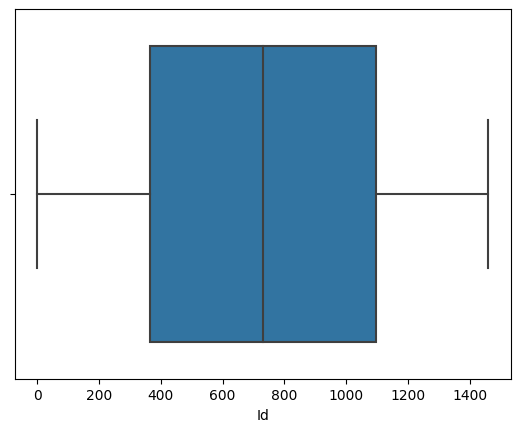

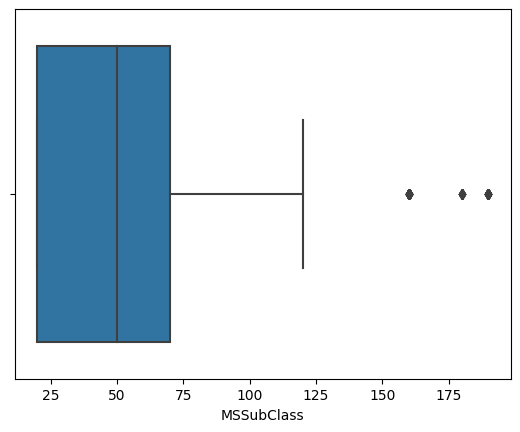

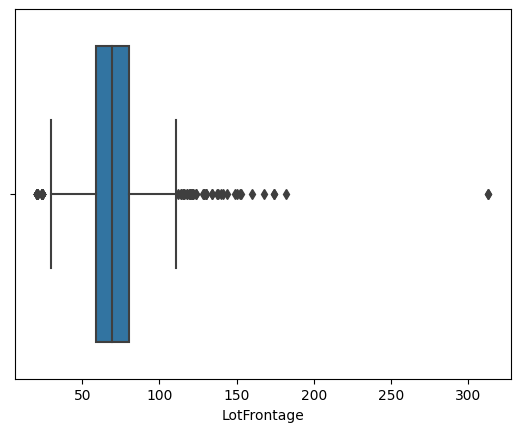

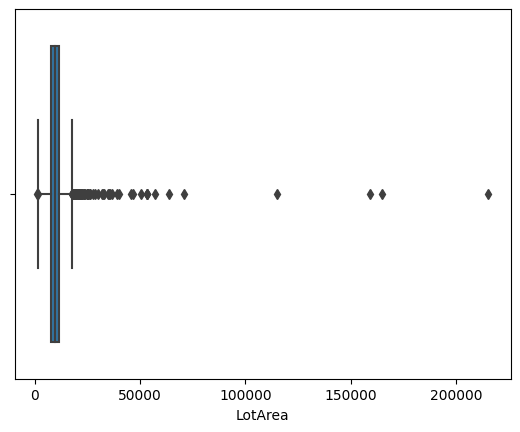

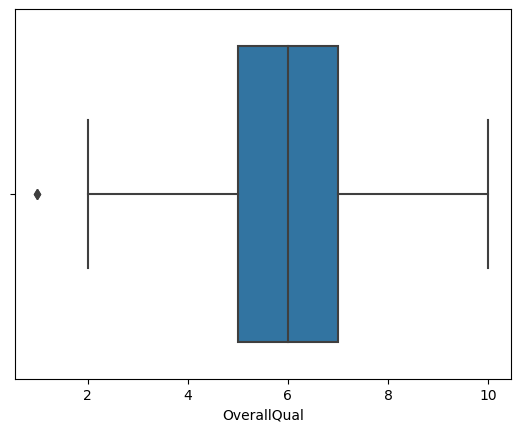

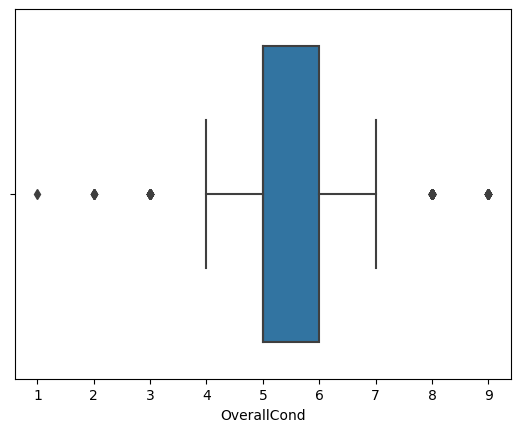

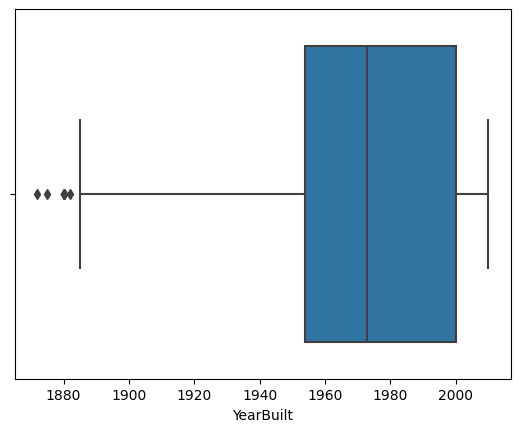

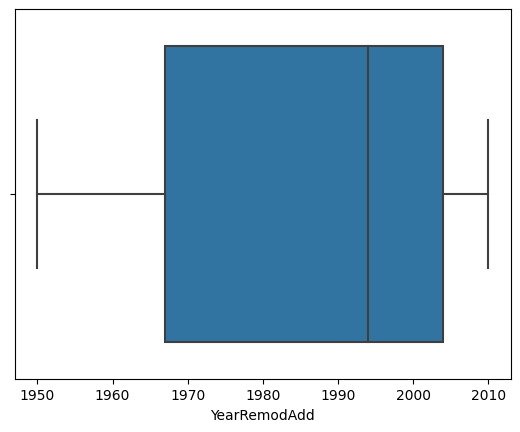

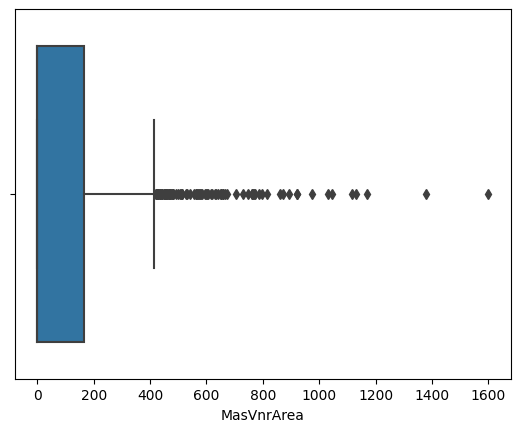

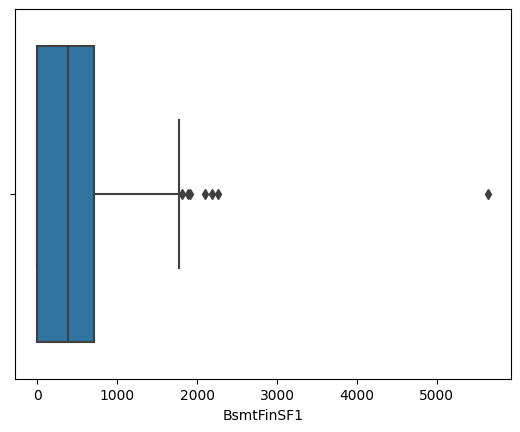

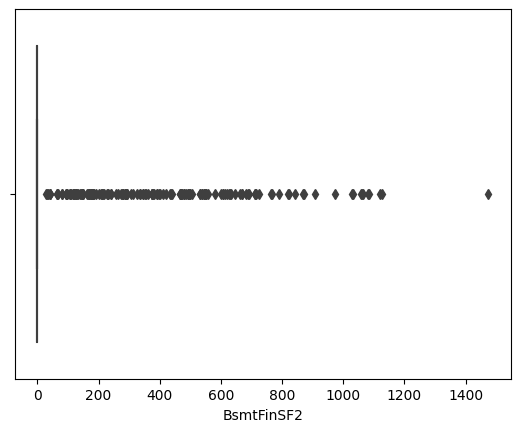

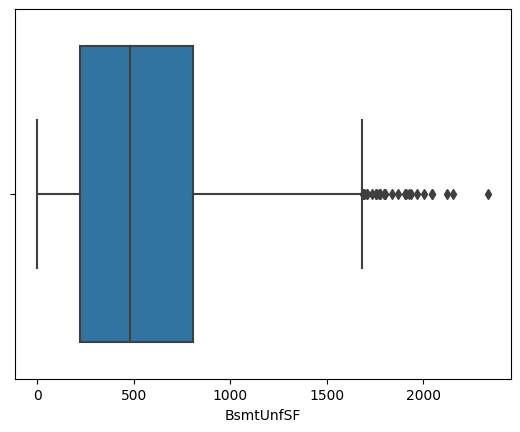

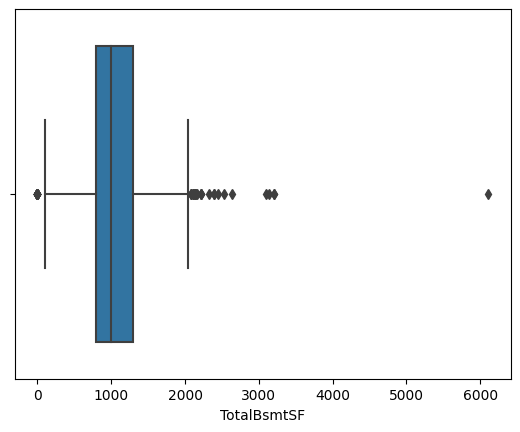

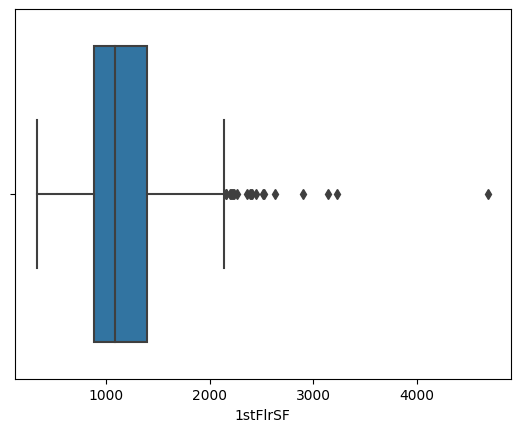

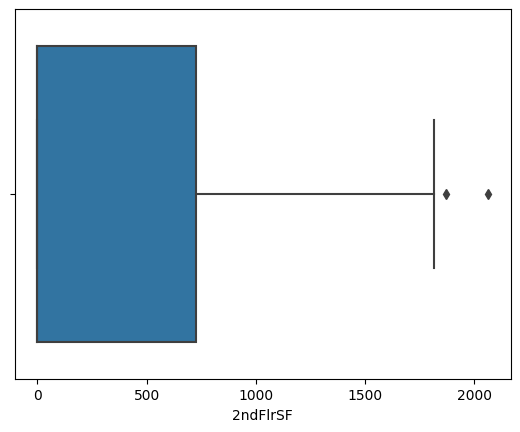

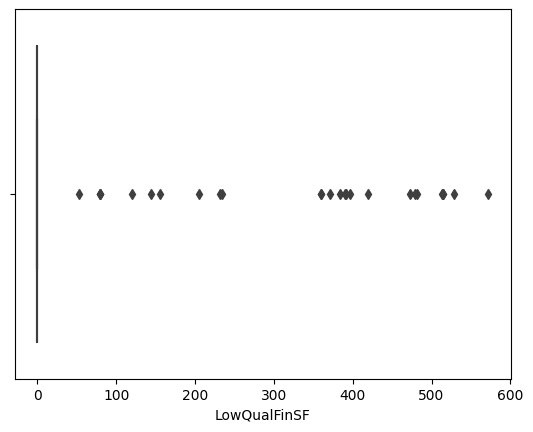

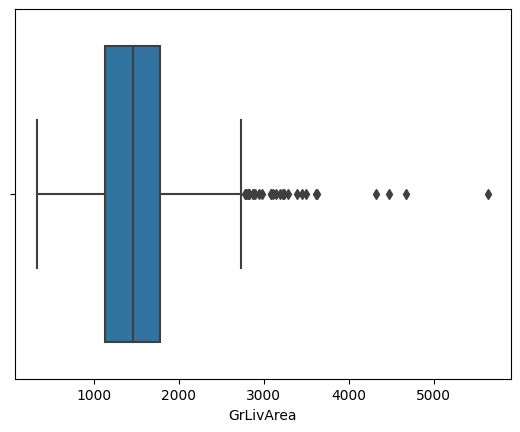

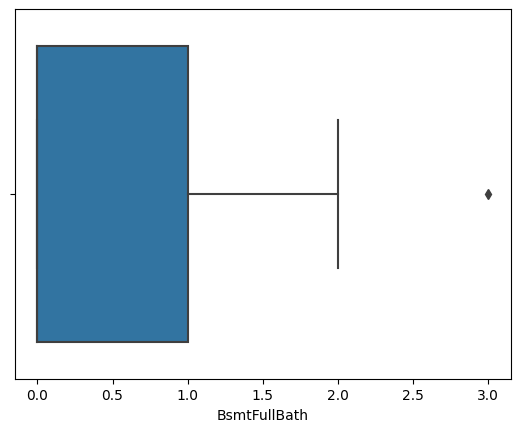

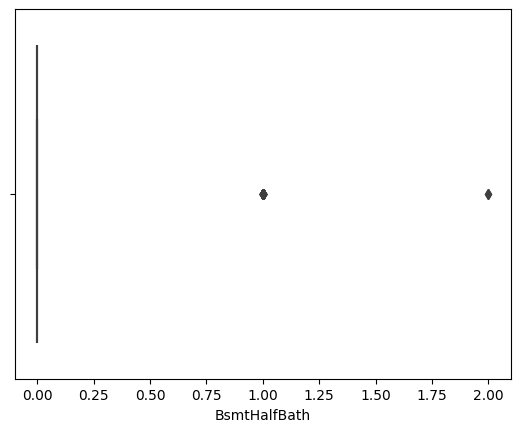

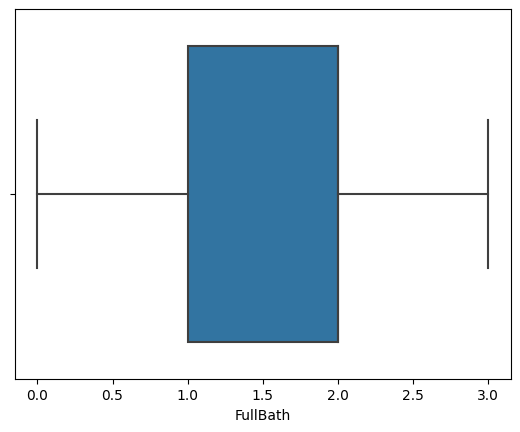

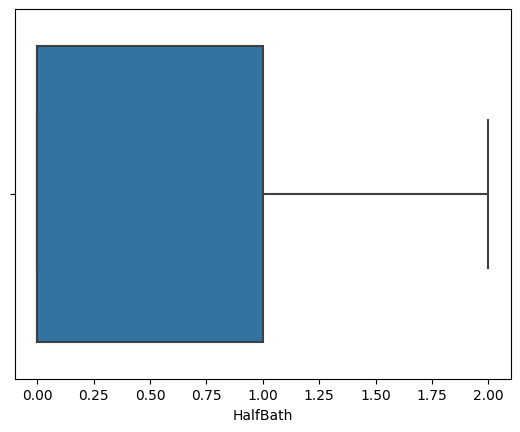

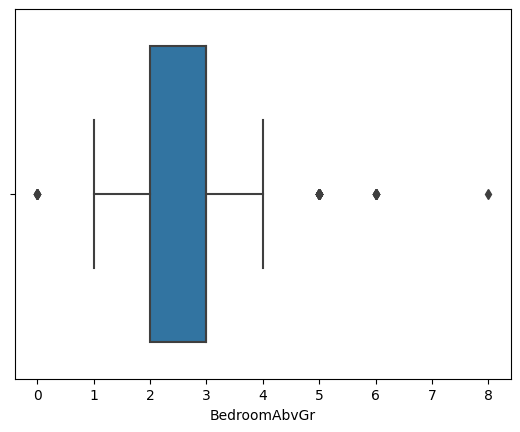

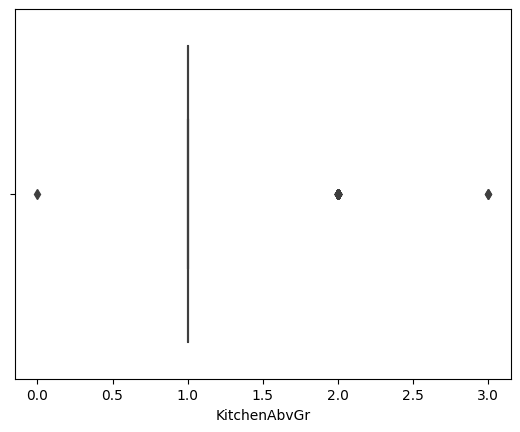

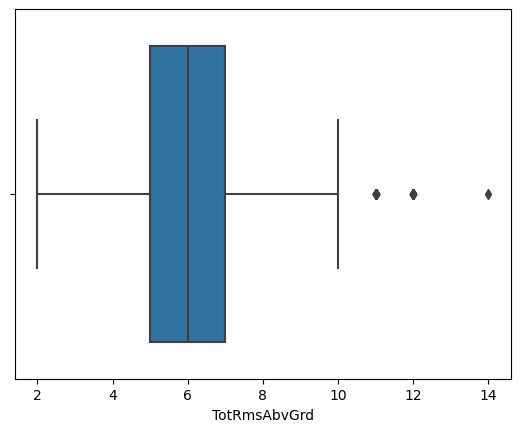

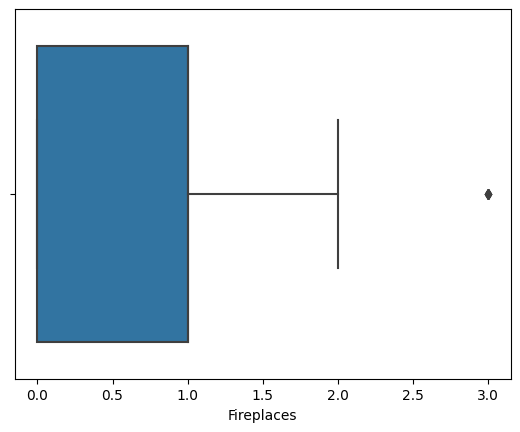

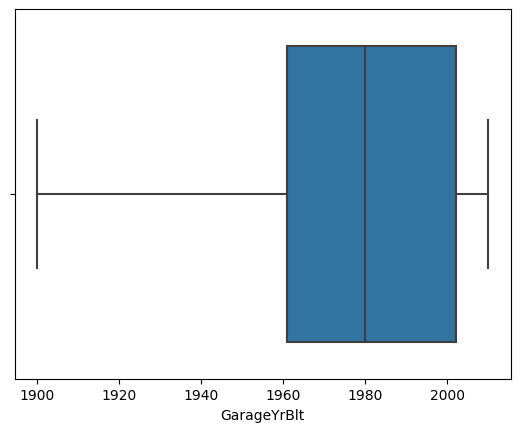

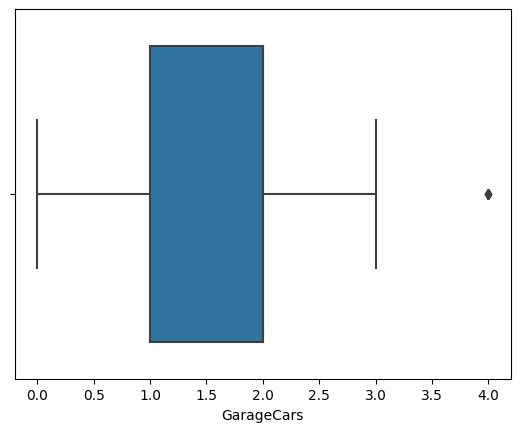

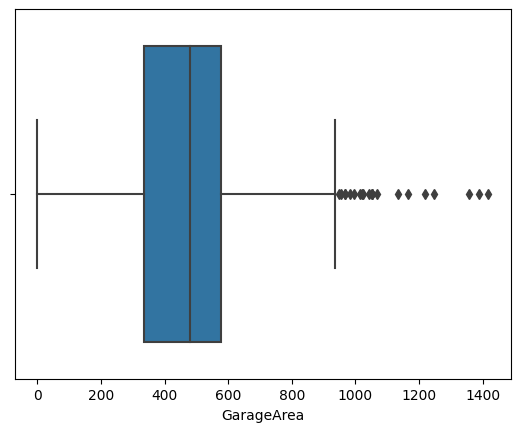

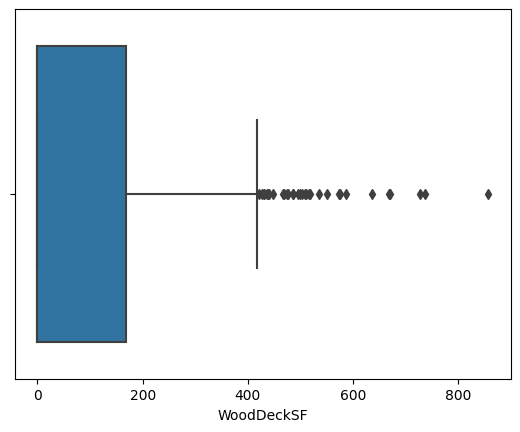

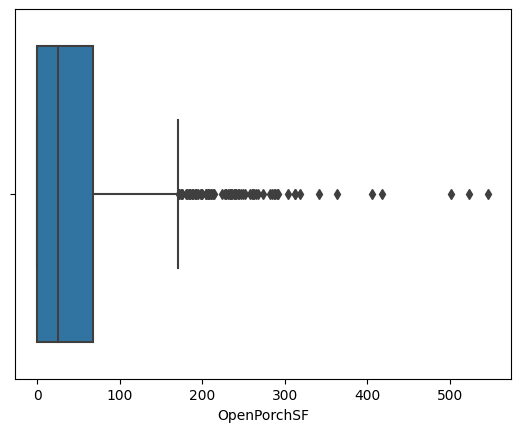

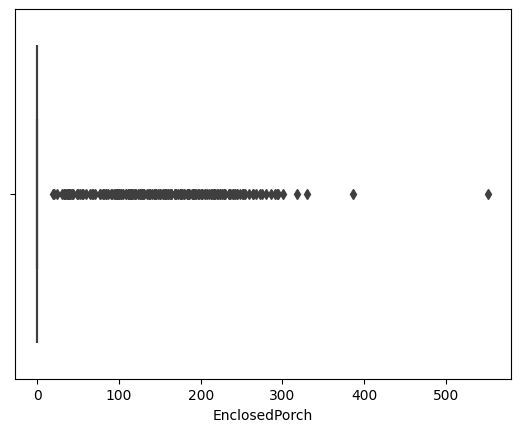

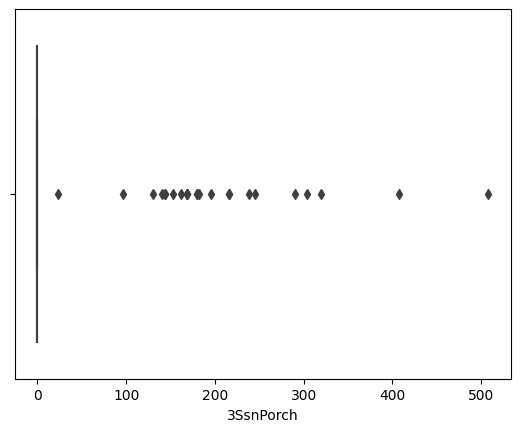

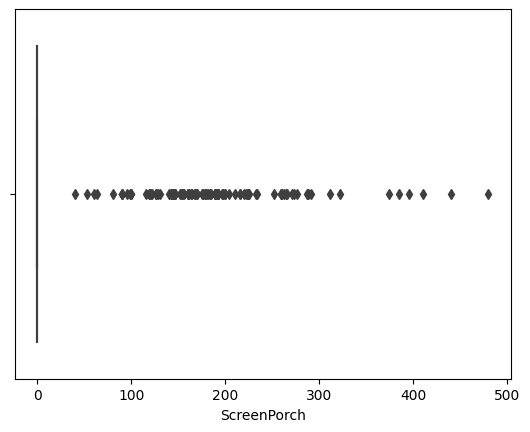

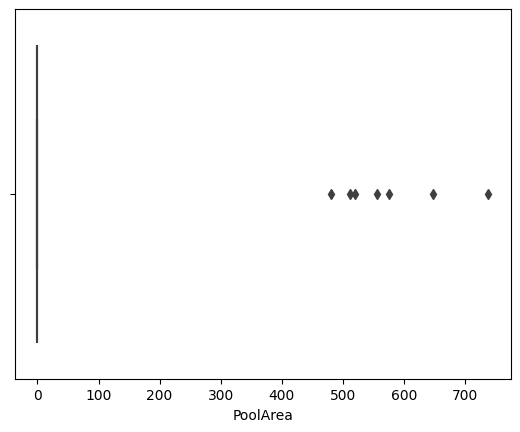

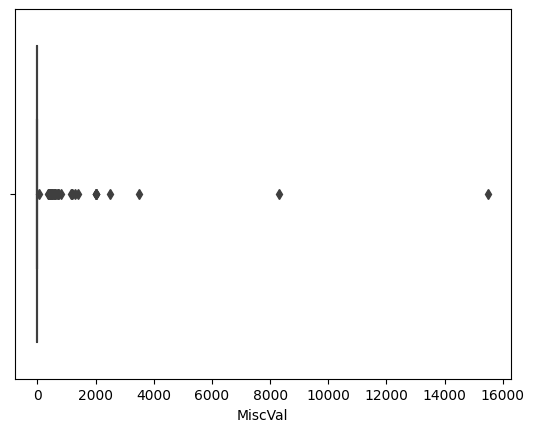

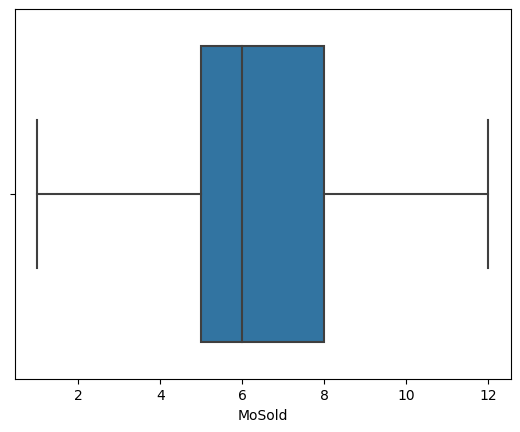

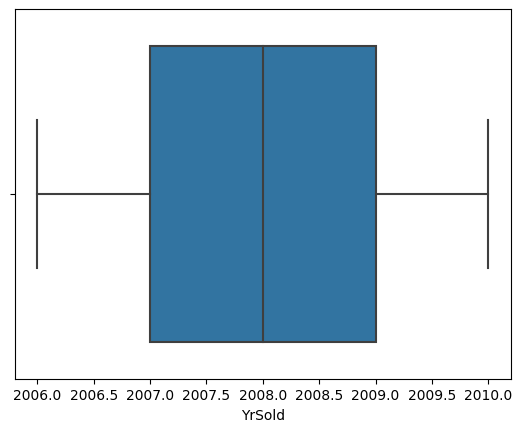

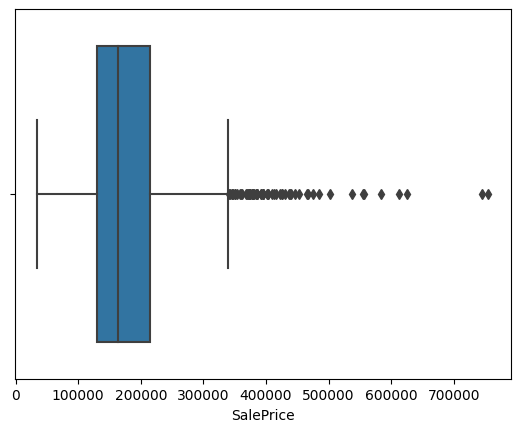

In [13]:
#Boxplot to identify outliers for the numeric columns
for i in train.select_dtypes(include='number').columns:
    sns.boxplot(data=train,x=i)
    plt.show()

## Dropping unnecessary columns and the columns having grater than 50% missing values

In [14]:
train = train.drop(columns=['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature','GarageYrBlt'], axis=1)
test = test.drop(columns=['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature','GarageYrBlt'], axis=1)

## Filling Missing Values

In [15]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageType']=train['GarageType'].fillna('Attchd')
train['GarageFinish']=train['GarageFinish'].fillna('Unf')
train['GarageQual']=train['GarageQual'].fillna('TA')
train['GarageCond']=train['GarageCond'].fillna('TA')
train['BsmtFinType2']=train['BsmtFinType2'].fillna('Unf')
train['BsmtExposure']=train['BsmtExposure'].fillna('No')
train['BsmtFinType1']=train['BsmtFinType1'].fillna('Unf')
train['BsmtCond']=train['BsmtCond'].fillna('TA')
train['BsmtQual']=train['BsmtQual'].fillna('TA')
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['Electrical']=train['Electrical'].fillna('SBrkr')

In [16]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageFinish']=test['GarageFinish'].fillna('Unf')
test['GarageQual']=test['GarageQual'].fillna('TA')
test['GarageCond']=test['GarageCond'].fillna('TA')
test['GarageType']=test['GarageType'].fillna('Attchd')
test['BsmtCond']=test['BsmtCond'].fillna('TA')
test['BsmtQual']=test['GarageCond'].fillna('TA')
test['BsmtExposure']=test['BsmtExposure'].fillna('No')
test['BsmtFinType2']=test['BsmtFinType2'].fillna('Unf')
test['BsmtFinType1']=test['BsmtFinType1'].fillna('GLQ')
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['MSZoning']=test['MSZoning'].fillna('Unf')
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['Functional']=test['Functional'].fillna('Typ')
test['Utilities']=test['Utilities'].fillna('AllPub')
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0)
test['Exterior1st']=test['Exterior1st'].fillna('VinylSd')
test['Exterior2nd']=test['Exterior2nd'].fillna('VinylSd')
test['SaleType']=test['SaleType'].fillna('WD')
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['KitchenQual']=test['KitchenQual'].fillna('TA')
test['GarageCars']=test['GarageCars'].fillna(2.0)
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())

## EDA

<Axes: >

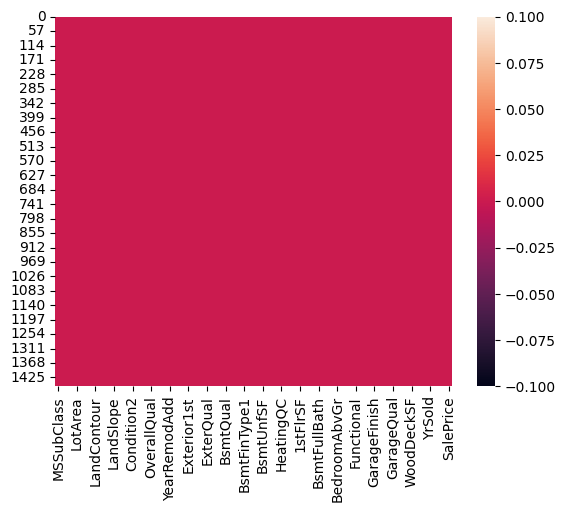

In [17]:
sns.heatmap(train.isnull())

<Axes: >

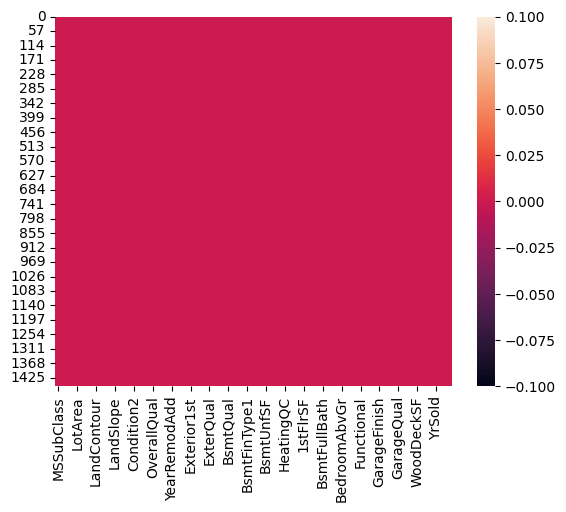

In [18]:
sns.heatmap(test.isnull())

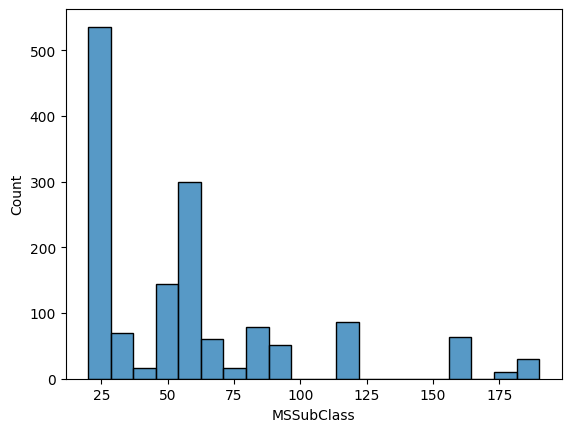

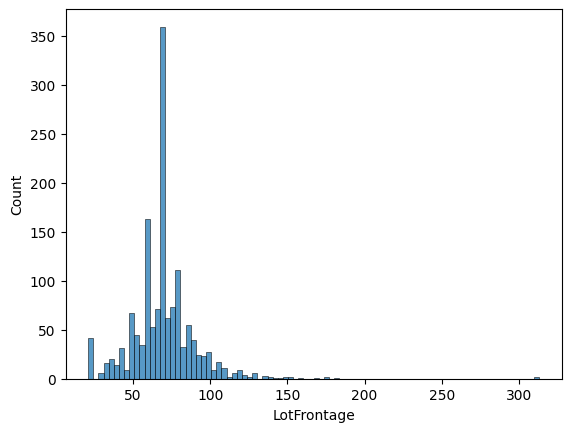

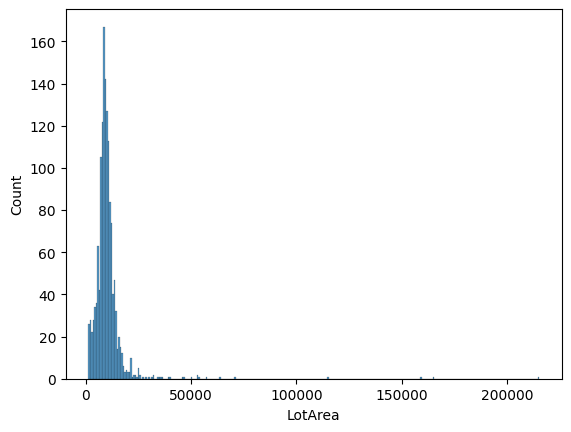

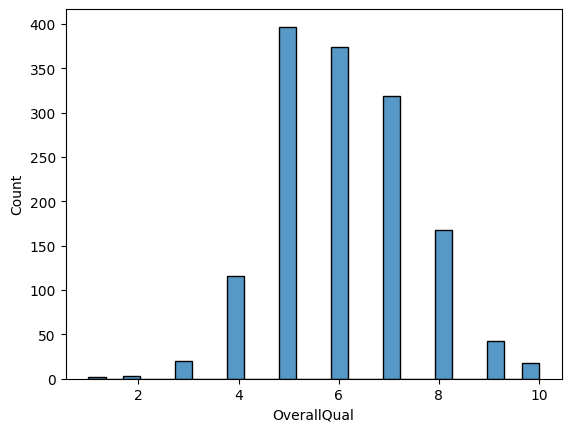

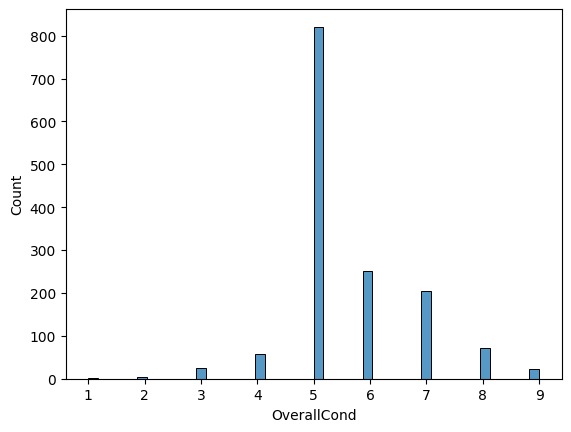

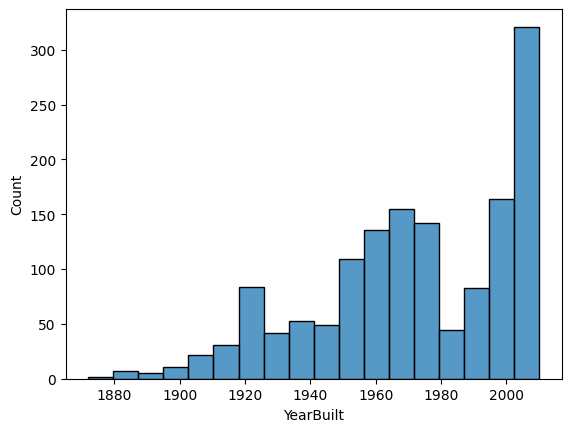

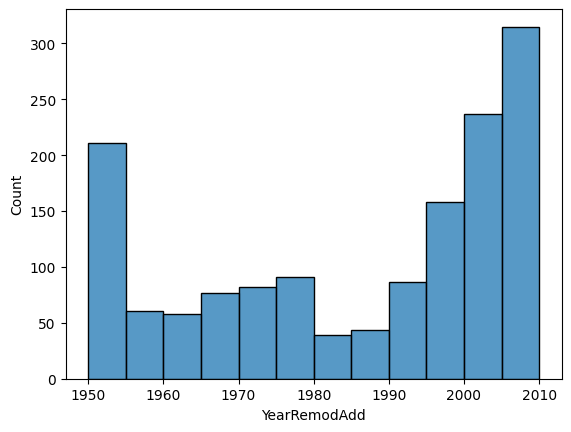

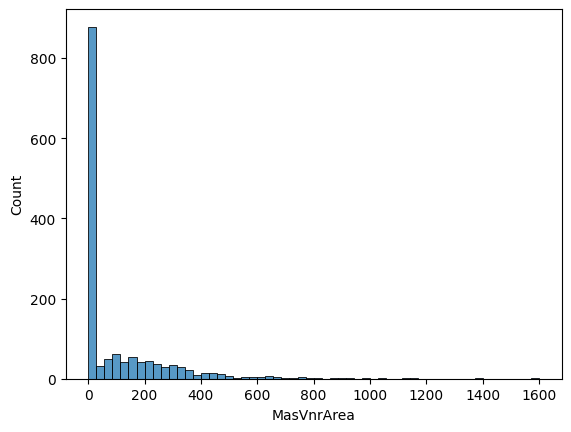

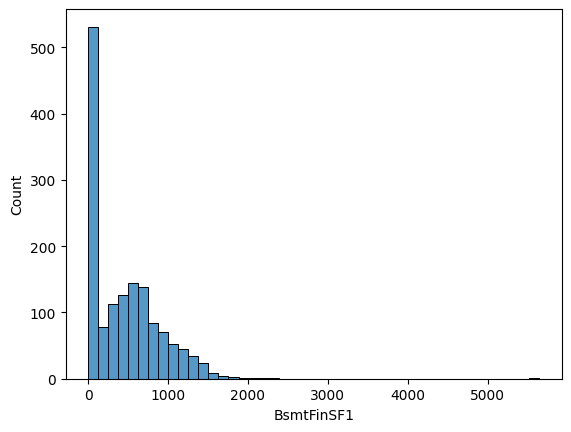

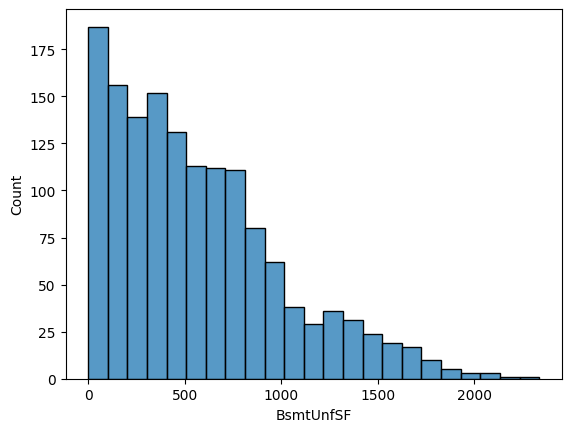

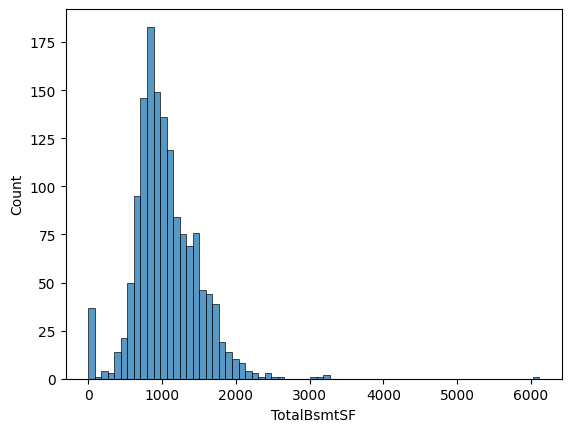

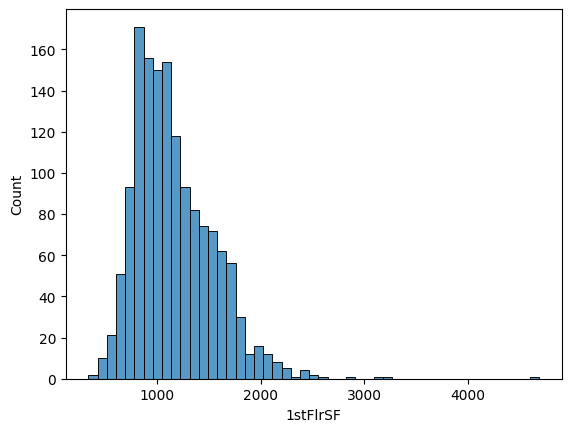

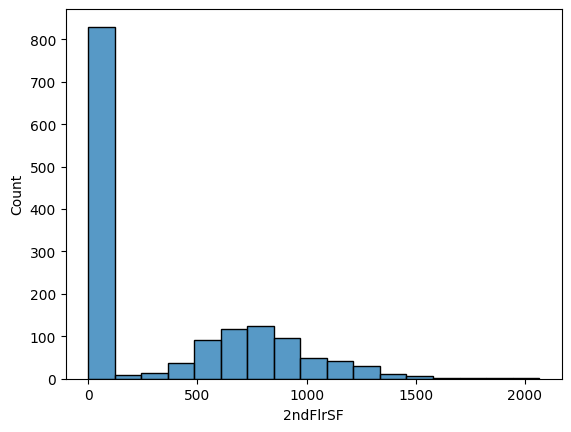

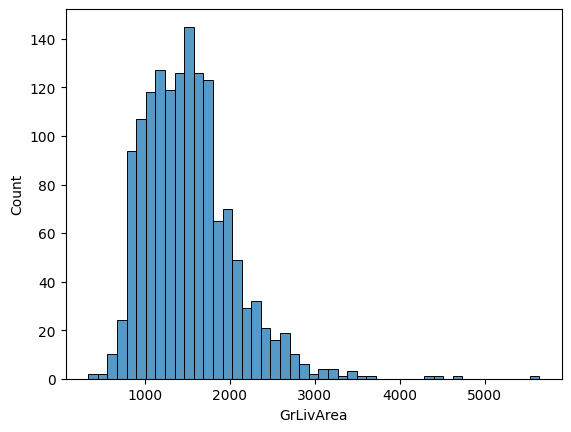

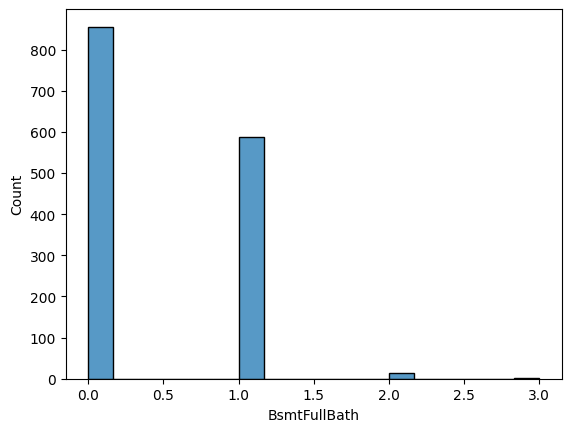

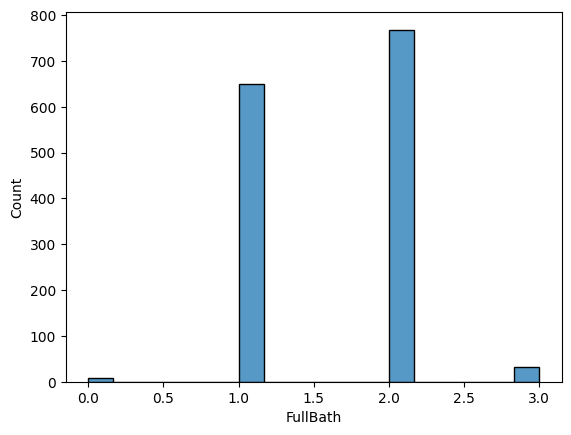

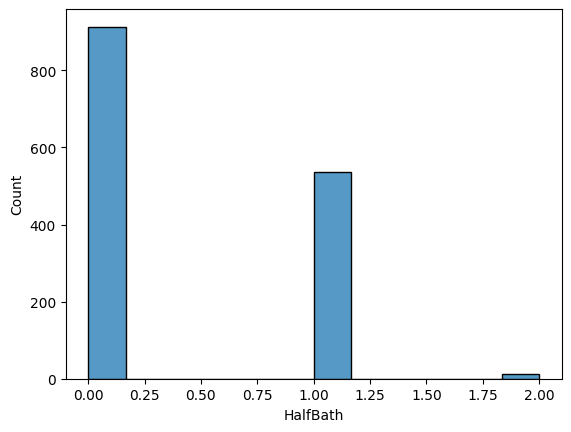

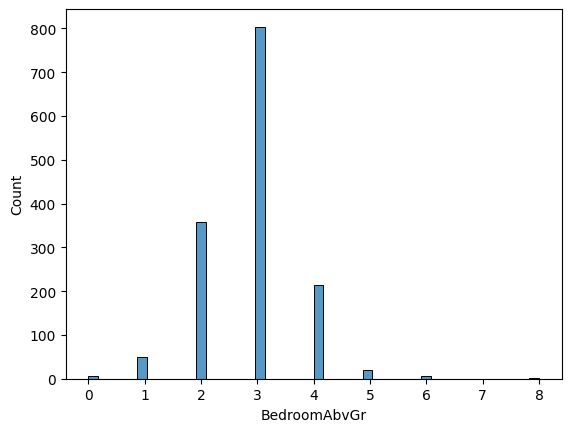

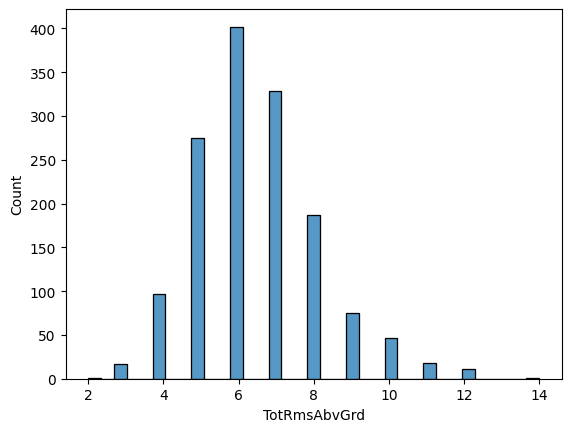

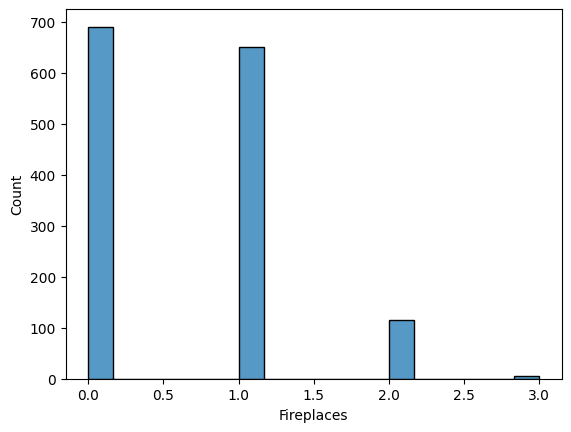

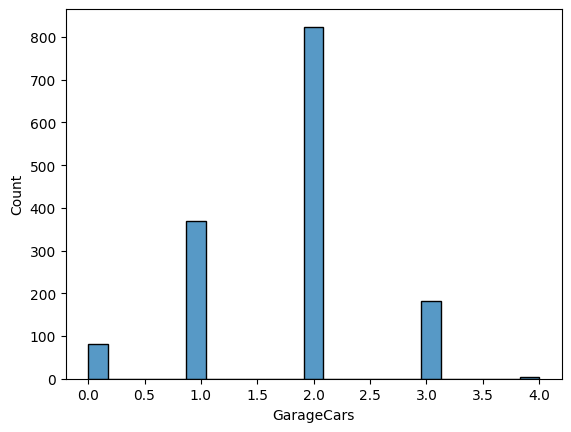

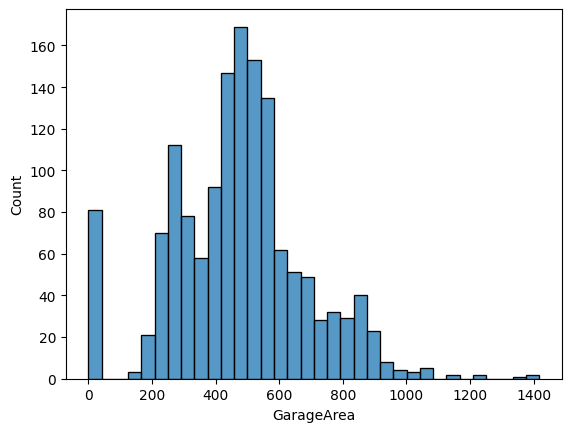

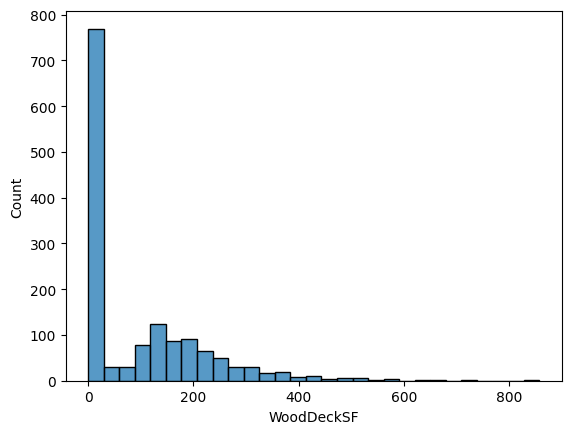

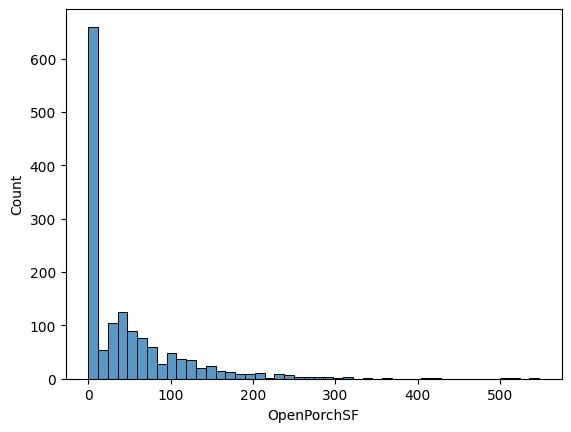

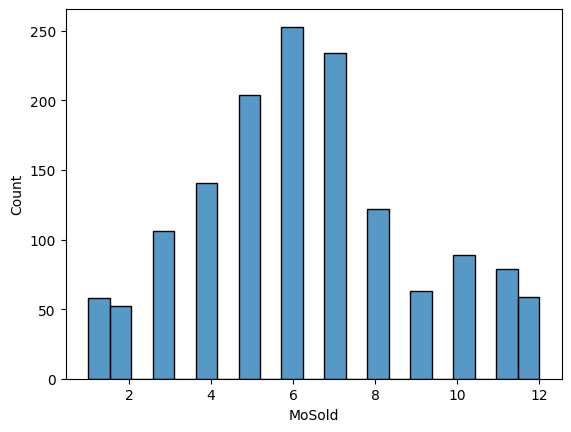

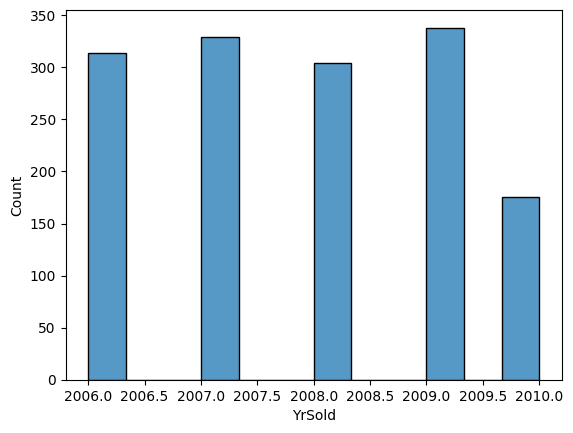

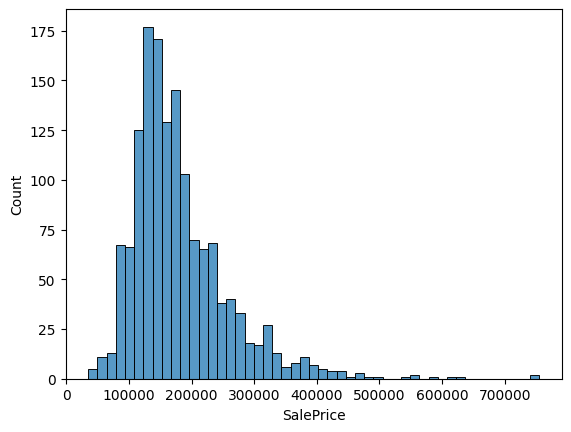

In [19]:
#Histogram for every columns that have numeric values
for i in train.select_dtypes(include='number').columns:
    sns.histplot(data=train,x=i)
    plt.show()

## Categorical Columns for train and test data

In [20]:
categorical_columns_train = train.select_dtypes(include=['object']).columns
categorical_columns_train

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
categorical_columns_test = test.select_dtypes(include=['object']).columns
categorical_columns_test

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,40,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,60,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366,0,4,2010,WD,Normal,142125


In [23]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,730.0,TA,TA,Y,140,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,312.0,TA,TA,Y,393,36,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,482.0,TA,TA,Y,212,34,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,470.0,TA,TA,Y,360,36,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,506.0,TA,TA,Y,0,82,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,TA,TA,Y,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,286.0,TA,TA,Y,0,24,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,576.0,TA,TA,Y,474,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,TA,TA,Y,80,32,7,2006,WD,Normal


## Encoding categoricl columns Training and test data

In [24]:
df1= pd.get_dummies(train, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'], drop_first=True)

In [25]:
df2 = pd.get_dummies(test, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'], drop_first=True)

In [26]:
x= df1.drop(['SalePrice'],axis=1)
  
y= df1['SalePrice']

## scaling  data

In [27]:
from sklearn.preprocessing import StandardScaler 
st= StandardScaler()

In [28]:
x1= pd.DataFrame(st.fit_transform(x)) 

In [29]:
df3= pd.DataFrame(st.fit_transform(df2))

In [30]:
from sklearn.decomposition import PCA
PCAModel = PCA(n_components=15)
x2=PCAModel.fit_transform(x1)

In [31]:
r=pd.DataFrame(x2)
r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.239145,1.754197,-1.383158,-1.744444,0.088409,-2.215027,-0.413019,0.582312,-1.597217,0.354464,0.558763,0.295412,0.343178,-0.069058,-0.149534
1,-0.152744,-2.996981,-0.635033,-0.040343,0.580029,-0.100549,-1.320144,-0.859964,0.616474,0.936665,2.384513,1.901472,1.461938,1.373224,-0.921416
2,4.727270,1.284491,-0.971741,-1.340006,0.519363,-2.407221,-0.912484,0.249833,-1.216251,0.253917,0.574144,-0.288247,0.261913,-0.116717,-0.093124
3,-1.197552,1.234923,1.972938,-0.821939,0.048517,-0.044965,-1.250248,-1.259552,0.358969,0.127864,-1.015464,-1.050354,0.014462,-3.068643,-0.967537
4,6.396064,0.740692,1.590756,-2.515449,0.162545,-1.627575,-1.016590,1.218949,-1.523440,0.938534,0.870426,-0.032917,0.744378,0.441146,0.467658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.038260,2.381917,-0.604273,-2.121051,-1.864115,-2.021919,1.247096,-0.083680,0.534492,-0.078073,-0.722588,-0.277758,-0.679636,0.786514,-0.733372
1456,-0.308542,-5.318051,1.310046,-0.884193,-0.270869,0.464254,1.339687,1.779113,0.977093,-2.119372,-0.449307,3.801886,-0.570445,0.269008,0.300045
1457,1.065084,1.800366,2.687727,-2.194812,1.796577,2.294098,-2.381377,0.668630,-0.586275,1.581902,-0.824286,2.638837,-4.384695,-5.741189,-3.465868
1458,-2.555138,-2.979195,-1.846508,1.182405,-0.051741,0.701836,-2.059117,-0.210316,-0.817909,1.379965,-0.229572,1.430240,1.050389,-0.151001,1.462487


## Train the Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(r, y, test_size=0.35,random_state=1200) # 65 training and 35% test

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
pred_y = lr.predict(X_test)

## Evaluation  of the model

In [36]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print(" mean_absolute_percentage_error ->",mean_absolute_percentage_error(y_test, pred_y))
print(" r2 score ->",r2_score(y_test, pred_y))

 mean_absolute_percentage_error -> 0.13014041877521876
 r2 score -> 0.8454245081516011


In [37]:
from sklearn.decomposition import PCA
PCAModel = PCA(n_components=15)
x5=PCAModel.fit_transform(df3)

## Prediction on test data 

In [38]:
pred_y_new = lr.predict(x5)

In [39]:
pred_y_new

array([132041.23280074, 161085.0860529 , 198587.76813469, ...,
       197604.6577953 , 150808.71890426, 212945.12180678])

In [40]:
test_result = pd.DataFrame(pred_y_new)

In [41]:
test_result

,0
0,132041.232801
1,161085.086053
2,198587.768135
3,208377.281573
4,205215.607558
...,...
1454,33973.927263
1455,56576.030166
1456,197604.657795
1457,150808.718904
